In [1]:
import numpy as np
import matplotlib.pyplot as plt

import conv
import async

In [3]:
# init data
np.random.seed(0)
p = 4
N = 1000
model, orig_data = async.get_ts(N, p=p)
times = np.linspace(0, N, N)

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.822


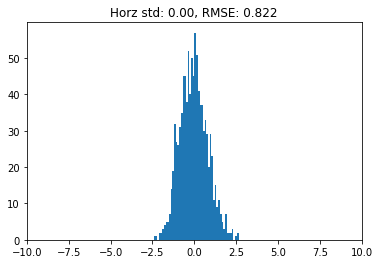

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.831


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.837


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.845


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.866


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.883


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.910


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.926


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.994


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 0.981


<Figure size 432x288 with 0 Axes>

Rec. using 10 piecewise, horizon 4.000
RMSE: 1.019


<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [21]:
# Test effect of horizontal noise (shifting measuring points)
fig, ax = plt.subplots()
for std_horizontal in np.linspace(0, 1, 50):
    data, times = async.resample(orig_data, std_horizontal=std_horizontal)
    theta, A, b, times_red = async.fit(data, times, p)
    y_rec = np.dot(A, theta)

    err = async.rmse(b, y_rec)
    print("RMSE: {0:.3f}".format(err))
    burn_in = len(data) - len(y_rec)
    residuals = b - y_rec

    ax.cla()
    ax.hist(residuals, bins=50)
    ax.set_xlim([-10, 10])
    ax.set_title("Horz std: {0:.2f}, RMSE: {1:.3f}".format(std_horizontal, err))
    plt.draw()
    plt.pause(0.2)
    

Rec. using 10 piecewise, horizon 4.000
[ 1.99503432e+13 -1.97390373e+13 -8.30037176e+11  1.55238414e+12
 -1.88514875e+12  1.73906778e+12 -1.20183781e+12  3.50137739e+11
 -9.66785540e+12  9.73198355e+12]
[0.72674208 1.38108394 0.47575774 0.38969466]


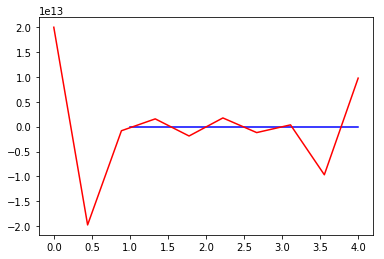

In [13]:
# See if calculated AR vector approaches true AR vector
fit_res = 10
width = p / fit_res
data = orig_data
theta, A, b, times_red = async.fit(data, times, p, fit_res)
print(theta)

true_coeffs = model.ar[1:]
print(true_coeffs)

plt.plot([1, 2, 3, 4], true_coeffs, 'b')
plt.plot(np.linspace(0, p, fit_res), theta, 'r')

plt.show()



















